In [1]:
import numpy as np
import scipy.integrate
import scipy.special
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import holoviews as hv
import bootcamp_utils.hv_defaults
import bokeh.io


import IPython.display
from collections import namedtuple
SimulationData = namedtuple("SimulationData", ["params", "ts", "solution"])
from stimulus_experiments import *
from circuit_sim_bokeh import *

bokeh.io.output_notebook()
hv.extension('bokeh',  'matplotlib')



ModuleNotFoundError: No module named 'stimulus_experiments'

In [ ]:
def pos_hill(X, k, n):
    Xn = X**n
    kn = k**n
    
    return Xn/(Xn + kn)

def neg_hill(X, k, n):
    Xn = X**n
    kn = k**n
    return kn/(Xn + kn)

Non cooperative circuit 

In [ ]:
def paper_dvdt(xs, params, V = 1e-12):
    A, H, L= xs # if one quantity is negative make it 0 
    gamma = params['gamma']
    X = params['N']
    T = params['T']
    reg_deg = params['reg_deg']

    gamma_r = gamma
    dl = 0.027
    gamma_g = gamma
    aL = 2.92

    vmax = params['vmax'] 
    kR = params['kR'] # between 1 and 6
    dr = 0.02
    nL = params['nL']
    nr = params['nr'] # must be low 
    cp = params['cp']
    Kl = params['Kl']
    KLux = params['KLux']
    KA = params['KA']
   
    nl = params['nl']
    nA = params['nA']
    deg = params['deg']
    beta_l = params['beta_l']
    beta_A = params['beta_A']
    #Kl
    
    vmax = params['vmax'] 
    kR = params['kR'] # between 1 and 6
    dr = 0.02
    nr = params['nr'] # must be low 
  

    dL_dt = dr + vmax*(neg_hill(H, kR, nr)) - (gamma_g + deg)*L
    
    dA_dt = cp - (gamma_g)*A
    if reg_deg:
        dA_dt = cp*(dl + (1 - dl)*pos_hill(H, KLux, nL)) - (gamma_g + deg)*A # assume increase
    prod = beta_l*pos_hill(L, Kl, nl)
    
    dH_dt = X*(prod - beta_A*pos_hill(A, KA, nA)*H) - gamma_r*H - H*1e-3# gamma_r*H 
    return np.array([dA_dt, dH_dt, dL_dt])

In [5]:
def paper2_dvdt(xs, gamma, X, params, V = 1e-12):
    A, H, L= xs # if one quantity is negative make it 0 

    T = params['T']
    reg_deg = params['reg_deg']

    gamma_r = gamma
    dl = 0.027
    gamma_g = gamma
    aL = 2.92

    vmax = params['vmax'] 
    kR = params['kR'] # between 1 and 6
    dr = 0.02
    nL = params['nL']
    nr = params['nr'] # must be low 
    cp = params['cp']
    Kl = params['Kl']
    KLux = params['KLux']
    KA = params['KA']
   
    nl = params['nl']
    nA = params['nA']
    deg = params['deg']
    beta_l = params['beta_l']
    beta_A = params['beta_A']
    #Kl
    
    vmax = params['vmax'] 
    kR = params['kR'] # between 1 and 6
    dr = 0.02
    nr = params['nr'] # must be low 
  

    dL_dt = dr + vmax*(neg_hill(H, kR, nr)) - (gamma_g + deg)*L
    
    dA_dt = cp - (gamma_g)*A
    if reg_deg:
        dA_dt = cp*(dl + (1 - dl)*pos_hill(H, KLux, nL)) - (gamma_g + deg)*A # assume increase
    prod = beta_l*pos_hill(L, Kl, nl)
    
    dH_dt = X*(prod - beta_A*pos_hill(A, KA, nA)*H) - gamma_r*H - H*1e-3# gamma_r*H 
    return np.array([dA_dt, dH_dt, dL_dt])

In [7]:
default_params= {
    'gamma': 0.01,
    'N': 0.021,
    'T': 100,
    'nH': 1.8,
    'kH': 1,
    
    'vmax':1,
    'cp':1,
    
    'aR':5,
    'kR':  1,
    'nr':  1.8,
    'KLux': 474,
    'Kl': 6.74,
    'KA': 18.7,
    'deg': 0.0173,
    'beta_l' : 6.83,
    'nL': 1.01,
    'beta_A' : .33,
    'nl' : 3.41,
    
    
    'nA': 9.7,
    
    'reg_deg': False # reg_deg True means regulate deg 
    
    # 
    #1.80	1.00	2.875
   # 1.55	6.00	2.875
    # 1.30	1.00	2.875
    # 1.80	1.00	2.875
}



In [2]:
import autograd.numpy as agnp
from autograd.scipy.integrate import odeint
from autograd import jacobian
from autograd.builtins import tuple

import matplotlib.pyplot as plt

Ca0 = 1.0
k1 = k_1 = 3.0

tspan = agnp.linspace(0, 0.5)

def C(K):
    k1, k_1 = K
    def dCdt(Ca, t, k1, k_1):
        return -k1 * Ca + k_1 * (Ca0 - Ca)
    sol = odeint(dCdt, Ca0, tspan, tuple((k1, k_1)))
    return sol

tspan2 = agnp.linspace(0, 10.)
x0 = agnp.zeros(3)
x0 = (0.,0.,0.)
a0, h0, l0 = end
x0 = (a0, h0, l0)
def C2(K):
    gamma, N = K 
    #print(gamma, N, x0)

    def dC2dt(xs, t, gamma, N):
        
        return paper2_dvdt(xs, gamma, N, default_params)
    sol = odeint(dC2dt, x0, tspan2, tuple((gamma, N)))
    return sol
        
K2 =   [1e-2, .1]     
stuff = C2(K2)
dC2dk = jacobian(C2, 0)



Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/python3.7-bioscrape/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


NameError: name 'end' is not defined

In [ ]:
tspan2 = agnp.linspace(0, 100.)
K2 =   [1e-2, 1e-1]    
default_params['gamma'] = K2[0]
default_params['N'] = K2[1]
simdata = simulate(paper_dvdt, 
                   default_params, (0,0,0)
                   , 
                   t_max = 1000, n_times = 1000)

end = simdata.solution[-1]

a0, h0, l0 = end
x0 = (a0, h0, l0)
def C2(K):
    gamma, N = K 


    def dC2dt(xs, t, gamma, N):
        
        return paper2_dvdt(xs, gamma, N, default_params)
    sol = odeint(dC2dt, x0, tspan2, tuple((gamma, N)))
    return sol

dC2dk = jacobian(C2, argnum = 0)
k_sensitivity = dC2dk(np.array(K2))

In [6]:
stuff[:,0,-1]

NameError: name 'stuff' is not defined

In [209]:
stuff[:,1,-1]

array([ 1.31289626e-05,  1.77131795e+00, -3.34373857e+00])

In [211]:

def double_sensitivity_params(paper2_dvdt, default_params, 
                              param_N_range = np.logspace(-2, 1, 10), 
                              param_g_range = np.logspace(np.log10(.005), np.log10(.02), 10),
                              
                              tspan2 = agnp.linspace(0, 1200.), 
                             x0 = (0,0,0)):

    def C2(K):
        gamma, N = K 
     


        def dC2dt(xs, t, gamma, N):
        
            return paper2_dvdt(xs, gamma, N, default_params)
        sol = odeint(dC2dt, x0, tspan2, tuple((gamma, N)))
        return sol
    
    
    k = 0 
    gamma_sensitivities = np.zeros((len(param_N_range)*len(param_g_range), 2 + len(names)))
    N_sensitivities = np.zeros((len(param_N_range)*len(param_g_range), 2 + len(names)))

    for j, p2 in enumerate(param_g_range):

        for i, p1 in enumerate(param_N_range):
            
            K2 = [p2, p1]
           # print(K2)

             
            sensitivities = nd.Jacobian(C2)(K2).T
            
            gamma_sensitivities[k, 2:] = sensitivities[:, 0, -1]
            N_sensitivities[k, 2:] = sensitivities[:, 1, -1]
            gamma_sensitivities[k, 0] = p1
            N_sensitivities[k, 0] = p1                               
            gamma_sensitivities[k, 1] = p2
            N_sensitivities[k, 1] = p2                                 

            k = k + 1 
        
    df_g = pd.DataFrame(gamma_sensitivities, columns = ['N', 'gamma'] + names)
    df_g['sensitivity_to'] = 'gamma'
    df_N = pd.DataFrame(N_sensitivities, columns = ['N', 'gamma'] + names)
    df_N['sensitivity_to'] = 'N'
                               
    df_tidy_g = pd.melt(df_g, value_vars = names, id_vars = ['N', 'gamma'],
                  value_name = 'sensitivity',
                 var_name = 'species')
    df_tidy_g['sensitivity_to'] = 'gamma'
    df_tidy_N = pd.melt(df_N, value_vars = names, id_vars = ['N', 'gamma'],
                  value_name = 'sensitivity',
                 var_name = 'species')
    df_tidy_N['sensitivity_to'] = 'N'
    return pd.concat([df_tidy_N, df_tidy_g])   


In [8]:
df_tidy = double_sensitivity_params(paper2_dvdt, default_params, names,
                              
                    )
                                    

In [18]:
tspan2 = agnp.linspace(0, 100.)
K2 =   [1e-2, 1e-1]    
default_params['gamma'] = K2[0]
default_params['N'] = K2[1]
simdata = simulate(paper_dvdt, 
                   default_params, (0,0,0)
                   , 
                   t_max = 1000, n_times = 1000)

end = simdata.solution[-1]


NameError: name 'simulate' is not defined

In [16]:
import numdifftools as nd
K2 =   [1e-2, .1]  
tspan2 = np.linspace(0, 1000)
def C2(K):
    gamma, N = K 


    def dC2dt(xs, t, gamma, N):
        
        return paper2_dvdt(xs, gamma, N, default_params)
    sol = odeint(dC2dt, x0, tspan2, tuple((gamma, N)))
    return sol
sensitivities = nd.Jacobian(C2)(K2).T

In [9]:

def pos_hill(X, k, n):
    Xn = X**n
    kn = k**n
    
    return Xn/(Xn + kn)

def neg_hill(X, k, n):
    Xn = X**n
    kn = k**n
    return kn/(Xn + kn)


In [12]:
sensitivities.shape
stuff = sensitivities

Text(0, 0.5, 'sensitivity')

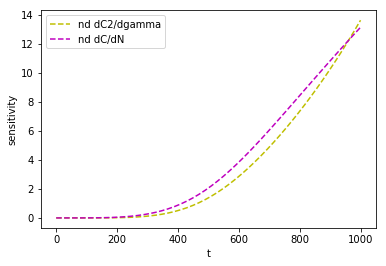

In [17]:
ind = 1

#gamma_sensitivity = k_sensitivity[:, ind, 0]
#N_sensitivity = k_sensitivity[:, ind, 1]

gamma_sensitivitynd = stuff[ind, 0, :]
N_sensitivitynd = stuff[ind, 1, :]


#plt.plot(tspan2, np.abs(gamma_sensitivity), label='dC2/dgamma')
#plt.plot(tspan2, np.abs(N_sensitivity), label='dC/dN')
plt.plot(tspan2, np.abs(gamma_sensitivitynd),'y--', label='nd dC2/dgamma')
plt.plot(tspan2, np.abs(N_sensitivitynd), 'm--', label='nd dC/dN')

plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('sensitivity')
    

Text(0, 0.5, 'sensitivity')

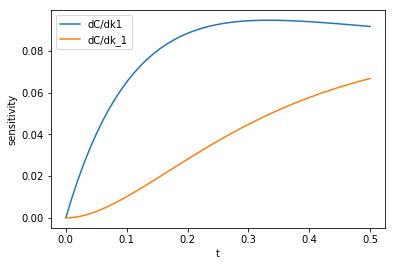

In [130]:

K2 = [k1, k_1]


dCdk = jacobian(C, 0)


k_sensitivity = dCdk(np.array(K2))

k1_sensitivity = k_sensitivity[:, 0, 0]
k_1_sensitivity = k_sensitivity[:, 0, 1]

plt.plot(tspan, np.abs(k1_sensitivity), label='dC/dk1')
plt.plot(tspan, np.abs(k_1_sensitivity), label='dC/dk_1')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('sensitivity')
    

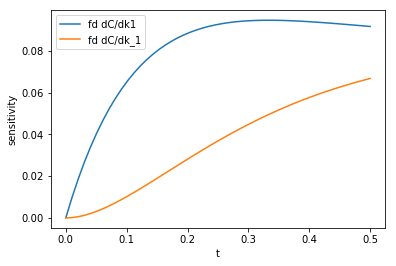

In [36]:
import numdifftools as nd 

fdk1, fdk_1 = nd.Jacobian(C)([k1, k_1]).T

plt.plot(tspan, np.abs(fdk1), label='fd dC/dk1')
plt.plot(tspan, np.abs(fdk_1), label='fd dC/dk_1')
#plt.plot(tspan, np.abs(k1_sensitivity), 'y--', label='dC/dk1')
#plt.plot(tspan, np.abs(k_1_sensitivity),'m--', label='dC/dk_1')
plt.legend(loc='best');
plt.xlabel('t');
plt.ylabel('sensitivity');

In [7]:
# make sure to replace with parameters fro the luxr repressable paper 

default_params= {
    'gamma': 0.01,
    'N': 0.021,
    'T': 100,
    
    'vmax':1,
    'kR':  1,
    'nr':  1.8,
    'reg_deg': False
    # 
    #1.80	1.00	2.875
   # 1.55	6.00	2.875
    # 1.30	1.00	2.875
    # 1.80	1.00	2.875
}

default_params= {
    'gamma': 0.01,
    'N': 0.021,
    'T': 100,
    'nH': 1.8,
    'kH': 1,
    
    'vmax':1,
    'cp':1,
    
    'aR':5,
    'kR':  1,
    'nr':  1.8,
    'KLux': 474,
    'Kl': 6.74,
    'KA': 18.7,
    'deg': 0.0173,
    'beta_l' : 6.83,
    'nL': 1.01,
    'beta_A' : .33,
    'nl' : 3.41,
    
    
    'nA': 9.7,
    
    'reg_deg': False # reg_deg True means regulate deg 
    
    # 
    #1.80	1.00	2.875
   # 1.55	6.00	2.875
    # 1.30	1.00	2.875
    # 1.80	1.00	2.875
}


dL = 0.014

gamma_g = 0.01
deg = 0.0173
AL = 11.2
AT = .8
dT = .03
Ao = dL*AL/(gamma_g + deg)
Lo = dT*AT/(gamma_g + deg)
Ho = 0


state_inits = (0, 0, 0)


names = ['A', 'H', 'L']
tmax = 500
simdata = simulate(paper_dvdt, 
                   default_params, state_inits
                   , 
                   t_max = 1000, n_times = 1000)

df_tidy = get_df(simdata, names, normalize = True)
p = hv_plot(df_tidy)
bokeh.io.show(p)

In [91]:
end = simdata.solution[-1]
end

array([99.99540094,  2.82036137,  5.63969796])

In [25]:
default_params['N'] = 1
simdata = simulate(paper_dvdt, 
                   default_params, state_inits, 
                   t_max = 500, n_times = 1000)

simdata_recovery = stimulus_species(simdata, paper_dvdt, default_params, names, 500)


p, df, e = plot_compiled_data(simdata, simdata_recovery,
                       names, to_plot = 'H')

bokeh.io.show(p)

In [14]:
df = get_param_trajectories(paper_dvdt, state_inits, names, default_params, 
                            species = 'H', 
                            param = 'N',
                           param_range = np.logspace(-2, 0, 5))

p = hv_plot_param(df, species = 'H', param = 'N')
p.legend.visible = True
p.xaxis.major_label_text_font_size = "10pt"
p.xaxis.axis_label_text_font_size = '5pt'

p.yaxis.major_label_text_font_size = "10pt"
p.yaxis.axis_label_text_font_size = '5pt'
bokeh.io.show(p)

In [7]:
name3 = 'gamma'
param_range = np.logspace(np.log10(.005), np.log10(.02), 10)
param_N_range = np.logspace(-2, 1, 10)


df_tidy = double_param_search(name3, paper_dvdt, state_inits, 
                               default_params, names,
                              
                               name3,
                               log_y = False,
                               normalize = False,
                           
                            
                               
                               param1s = param_N_range,
                               param2s = param_range,
                               tmax = 5000, n_times = 10000,
                              )

plots = make_gridplot(df_tidy, names, 'N', 'gamma', logx = True)
#plots[2] = plots[2].x_range = bokeh.models.Range1d(0, 1000)

default_params['vmax'] = 20
bokeh.io.show(plots)

In [12]:
name3 = 'gamma'
param_range = np.logspace(np.log10(.005), np.log10(.02), 10)
param_N_range = np.logspace(-2, 1, 10)


df_tidy = double_param_overshoot(name3, paper_dvdt, state_inits, 
                               default_params, names,
                              
                               name3,
                               log_y = False,
                               normalize = False,
                           
                            
                               
                               param1s = param_N_range,
                               param2s = param_range,
                               tmax = 5000, n_times = 10000,
                              )

df_tidy.head()

,N,gamma,over
0,0.010000,0.005,3.632973
1,0.021544,0.005,5.185128
2,0.046416,0.005,6.135700
3,0.100000,0.005,6.620432
4,0.215443,0.005,6.858153


In [13]:
points = hv.Points(
        data=df_tidy, kdims=['N', 'over'], vdims=[name3],
  
  
        )

points.opts(logx = True, width = 400,
            
            color = name3, cmap='Viridis', colorbar=True, )


points

:Points   [N,over]   (gamma)

In [ ]:
state_inits = np.zeros(3)
param_range = np.logspace(np.log10(.005), np.log10(.02), 10)
param_N_range = np.logspace(-2, 1, 10)
default_params['reg_deg'] = True
default_params['cp'] = 15
default_params['vmax'] = .6
df_tidy = double_param_search(name3, paper_dvdt, state_inits, 
                               default_params, names,
                              
                               name3,
                               log_y = False,
                               normalize = False,
                           
                            
                               
                               param1s = param_N_range,
                               param2s = param_range,
                               tmax = tmax, n_times = 1000,
                              )

plots = make_gridplot(df_tidy, names, 'N', 'gamma', logx = True)
#plots[2] = plots[2].x_range = bokeh.models.Range1d(0, 1000)
bokeh.io.show(plots)

In [19]:
default_params['N'] = 10
simdat
simdata_recovery = stimulus_species(simdata, paper_dvdt, default_params, names, 1000)



p, df, e = plot_compiled_data(simdata, simdata_recovery,
      
                              names, to_plot = 'H')

bokeh.io.show(p)

In [20]:
default_params['N'] = 1
simdata_recovery = stimulus_species(simdata, paper_dvdt, default_params, names, 1000)



p, df, e = plot_compiled_data(simdata, simdata_recovery,
      
                              names, to_plot = 'H')

bokeh.io.show(p)

In [ ]:
name3 = 'gamma'
state_inits = np.zeros(5)
param_range = np.logspace(np.log10(.005), np.log10(.02), 10)
param_N_range = np.logspace(-2, 1, 10)
default_params['reg_deg'] = False
df_tidy = double_param_search_times(name3, paper_dvdt, (0,0,0), 
                               default_params, names,
                              
                               name3,
                               log_y = False,
                               normalize = False,
                           
                            
                               
                               param1s = param_N_range,
                               param2s = param_range,
                               tmax = 1000, n_times = 1000,
                              )

plot = time_plot(df_tidy, 'N', 'gamma', logx = True)
plot.y_range = bokeh.models.Range1d(0, 700)
bokeh.io.show(plot)

## Parameter pertubations

### Plateau Analysis 

In [ ]:
default_params['reg_deg'] = False
circuit_name = 'RQS_deg'
if default_params['reg_deg'] == True:
    circuit_name = 'RQS_reg_deg'


In [ ]:
gamma = 1e-1
param1 = 'vmax'
param2 = 'cp'
default_params['gamma'] = gamma 
dfs = []
vmax_range = np.logspace(-2, 2, 10)
temp_params = copy.copy(default_params)
for v in vmax_range: 
    temp_params[param1] = v # param1
   # print(temp_params)
    param_vary = param2
    plats = get_plateau(paper_dvdt, temp_params, state_inits, names, thresh = .95, 
                    param_vary = param_vary,
                    
                   #param_N_range = np.linspace(.05, 1, 20),
                   param_N_range = np.logspace(-1, 2, 20),
                   param_range = np.logspace(-2, 2, 10))
    plats[param1] = v
    dfs.append(plats)
    
df_full = pd.concat(dfs)

df_full.to_csv(f'plat_analysis_{circuit_name}_{param1}_{param2}_{str(gamma)}.csv')

In [ ]:
gamma = 1e-2
param1 = 'vmax'
param2 = 'cp'
default_params['gamma'] = gamma 
dfs = []
vmax_range = np.logspace(-2, 2, 10)
temp_params = copy.copy(default_params)
for v in vmax_range: 
    temp_params[param1] = v # param1
   # print(temp_params)
    param_vary = param2
    plats = get_plateau(paper_dvdt, temp_params, state_inits, names, thresh = .95, 
                    param_vary = param_vary,
                    
                   #param_N_range = np.linspace(.05, 1, 20),
                   param_N_range = np.logspace(-1, 2, 20),
                   param_range = np.logspace(-2, 2, 10))
    plats[param1] = v
    dfs.append(plats)
    
df_full = pd.concat(dfs)

df_full.to_csv(f'plat_analysis_{circuit_name}_{param1}_{param2}_{str(gamma)}.csv')

In [ ]:
gamma = 1e-3
param1 = 'vmax'
param2 = 'cp'
default_params['gamma'] = gamma 
dfs = []
vmax_range = np.logspace(-2, 2, 10)
temp_params = copy.copy(default_params)
for v in vmax_range: 
    temp_params[param1] = v # param1
   # print(temp_params)
    param_vary = param2
    plats = get_plateau(paper_dvdt, temp_params, state_inits, names, thresh = .95, 
                    param_vary = param_vary,
                    
                   #param_N_range = np.linspace(.05, 1, 20),
                   param_N_range = np.logspace(-1, 2, 20),
                   param_range = np.logspace(-2, 2, 10))
    plats[param1] = v
    dfs.append(plats)
    
df_full = pd.concat(dfs)

df_full.to_csv(f'plat_analysis_{circuit_name}_{param1}_{param2}_{str(gamma)}.csv')

In [ ]:
param1 = 'vmax'
param2 = 'cp'
df_full['log_plat'] = np.log10(df_full['plat'].values)
points = hv.HeatMap(
        data=df_full, kdims=[param1, param2], vdims=['log_plat'],
  
  
        )

points.opts(logy = True,  logx = True, width = 400,
            
            color = 'log_plat', cmap='Viridis', colorbar=True, )


points

In [ ]:
param_pairs = [
               ['Kl', 'kR'],
               ['beta_l', 'Kl'],
                ['KA', 'kR'],
    
               
               ['beta_l', 'vmax'],
               ['beta_l', 'kR'],
                   ['KLux', 'kR'],
                   ['cp', 'kR'],
                ['kR', 'aR'],
               ['KLux', 'KA'],
               ['KLux', 'cp'],
               ['KLux', 'vmax'],
               ['Kl', 'KLux'],
               
               ['KA', 'cp'],
    
               ['KA', 'beta_A'],
    ['kR', 'vmax'],
    
               
               ['Kl', 'vmax']]


prior_paris = [['vmax', 'cp'], ['Kl', 'vmax'], ['kR', 'vmax']
              ['KA', 'cp']]

default_params['reg_deg'] = False
default_params['N'] = 10
circuit_name = 'RQS_deg'
if default_params['reg_deg'] == True:
    circuit_name = 'RQS_reg_deg'
    
if default_params['cp'] == 0:
    circuit_name = 'RQS_no_deg'

gamma = 1e-3
default_params['gamma'] = gamma 


for param1, param2 in prior_paris :
    print(param1, param2)
    temp_params = copy.copy(default_params)
    fname1 = f'plat_analysis_{circuit_name}_{param1}_{param2}_{str(gamma)}.csv'
    fname2 = f'plat_analysis_{circuit_name}_{param1}_{param2}_{str(gamma)}.csv'
    if os.path.exists(fname1) or os.path.exists(fname1):
        
        continue 
        
    df = get_plat_rob(paper_dvdt, default_params, (0,0,0), names, param1, param2)
    df.to_csv(f'plat_analysis_{circuit_name}_{param1}_{param2}_{str(gamma)}.csv')
    


In [ ]:
param1 = 'vmax'
param2 = 'cp'


df_full['log_plat'] = np.log10(df_full['plat'].values)
points = hv.HeatMap(
        data=df_full, kdims=[param1, param2], vdims=['log_plat'],
  
  
        )

points.opts(logy = True,  logx = True, width = 400,
            
            color = 'log_plat', cmap='Viridis', colorbar=True, )


points

### Gamma robustness analysis  

In [ ]:
# to ensure we are working in limit of high N 
default_params['N'] = 10 
default_params['reg_deg'] = True
default_params['cp'] = 0
circuit_name = 'RQS_deg'
if default_params['reg_deg'] == True:
    circuit_name = 'RQS_reg_deg'
    
if default_params['cp'] == 0:
    circuit_name = 'RQS_no_deg'


Below are some initial parameter pairs of interest 

In [ ]:
param_pairs = [['KA', 'aR'], ['Kl', 'vmax'], ['vmax', 'aR'], ['KLux', 'aR'], ['KLux', 'vmax'], 
         ['KLux', 'KA'], ['KLux', 'kR'], 
        ['kR', 'aR'], ['kR', 'vmax'], ['KA', 'kR'], ['KLux', 'kR'], ['Kl', 'vmax'],
        ['Kl', 'KLux']]


param_pairs = [
               ['Kl', 'kR'],
               ['beta_l', 'Kl'],
                ['KA', 'kR'],
    
               
               ['beta_l', 'vmax'],
               ['beta_l', 'kR'],
                   ['KLux', 'kR'],
                   ['cp', 'kR'],
          
               ['KLux', 'KA'],
               ['KLux', 'cp'],
               ['KLux', 'vmax'],
               ['Kl', 'KLux'],
               
               ['KA', 'cp'],
    
               ['KA', 'beta_A'],
    ['kR', 'vmax'],
    
               
               ['Kl', 'vmax']]
prior_paris = [['vmax', 'cp'], ['Kl', 'vmax'], ['kR', 'vmax'],
              ['KA', 'cp']]


for param1, param2 in prior_paris:
    print(param1, param2)
    temp_params = copy.copy(default_params)
    fname1 = f'param_analysis/{circuit_name}_df_gamma_rob_{param2}_{param1}_layered.csv'
    fname2 = f'param_analysis/{circuit_name}_df_gamma_rob_{param1}_{param2}_layered.csv'
    if os.path.exists(fname1) or os.path.exists(fname1):
        
        continue 
        
    df_full = gamma_stuff(param1, param2, paper_dvdt, temp_params, state_inits, names)
    df_full.to_csv(fname2)
    


In [ ]:
param1, param2 = ['KA', 'cp']
df_full = pd.read_csv(f'param_analysis/{circuit_name}_df_gamma_rob_{param1}_{param2}_layered.csv', index_col = 0)
#df_gamma_med['log_plat'] = np.log10(df_gamma_med['plat'].values)
points = hv.HeatMap(
        data=df_full, kdims=[param1, param2], vdims=['rob_gamma'],
    
  
  
        )

points.opts(width = 400, logx = True, logy = True,
            
            color = 'rob_gamma', cmap='Viridis', colorbar=True, )



In [ ]:
param_vary = 'cp'
plats = get_gamma_rob(paper_dvdt, default_params, state_inits, names, 
                    param_vary = param_vary,
                      param_N_range = np.logspace(-1, 2, 10)
                    
                )

points = hv.Points(
        data=plats, kdims=[param_vary, 'rob_gamma'], vdims=['rob_gamma'],
  
        )

points.opts(logx = True)


points

In [ ]:
param_vary = 'Kl'
plats = get_gamma_rob(paper_dvdt, default_params, state_inits, names, 
                    param_vary = param_vary,
                      param_N_range = np.logspace(-1, 2, 10)
                    
                )

points = hv.Points(
        data=plats, kdims=[param_vary, 'rob_gamma'], vdims=['rob_gamma'],
  
        )

points.opts(logx = True)


points

In [ ]:
param_vary = 'vmax'
plats = get_gamma_rob(paper_dvdt, default_params, state_inits, names, 
                    param_vary = param_vary,
                      param_N_range = np.logspace(-1, 2, 10)
                    
                )

points = hv.Points(
        data=plats, kdims=[param_vary, 'rob_gamma'], vdims=['rob_gamma'],
  
        )

points.opts(logx = True)


points

In [ ]:
param_vary = 'beta_l'
plats = get_gamma_rob(paper_dvdt, default_params, state_inits, names, 
                    param_vary = param_vary,
                      param_N_range = np.logspace(-1, 2, 10)
                    
                )

points = hv.Points(
        data=plats, kdims=[param_vary, 'rob_gamma'], vdims=['rob_gamma'],
  
        )

points.opts(logx = True)


points

In [ ]:
param_vary = 'kR'
plats = get_gamma_rob(paper_dvdt, default_params, state_inits, names, 
                    param_vary = param_vary,
                      param_N_range = np.logspace(-1, 2, 10)
                    
                )

points = hv.Points(
        data=plats, kdims=[param_vary, 'rob_gamma'], vdims=['rob_gamma'],
  
        )

points.opts(logx = True)


points

In [ ]:
param_vary = 'Kl'
plats = get_gamma_rob(paper_dvdt, default_params, state_inits, names, 
                    param_vary = param_vary,
                      param_N_range = np.logspace(-1, 2, 10)
                    
                )

points = hv.Points(
        data=plats, kdims=[param_vary, 'rob_gamma'], vdims=['rob_gamma'],
  
        )

points.opts(logx = True)


points

In [ ]:
param_vary = 'KA'
plats = get_gamma_rob(paper_dvdt, default_params, state_inits, names, 
                    param_vary = param_vary,
                      param_N_range = np.logspace(-1, 2, 10)
                    
                )

points = hv.Points(
        data=plats, kdims=[param_vary, 'rob_gamma'], vdims=['rob_gamma'],
  
        )

points.opts(logx = True)


points

## Stimulus Experiments 

First we stimulate with respect to $N$. 

In [ ]:

default_params= {
    'gamma': 0.01,
    'N': 0.021,
    'T': 100,
    
    'vmax':1,
    'kR':  1,
    'nr':  1.8,
    'reg_deg': False
    # 
    #1.80	1.00	2.875
   # 1.55	6.00	2.875
    # 1.30	1.00	2.875
    # 1.80	1.00	2.875
}
state_inits = (0,0,0)
tmax = 1000
simdata = simulate(paper_dvdt, 
                   default_params, state_inits, 
                   t_max = tmax, n_times = 10000)
circuit = 'RQS'
if default_params['reg_deg']:
    circuit = 'RQS_deg'
df_stim_N = multiple_param_stimulus(simdata, paper_dvdt, 
                               default_params, tmax, names)



df_stim_N.head()

In [ ]:
factor = .5

params = ['N', 'gamma']
for param in params:
    simdata_recovery = stimulus_param(simdata, paper_dvdt, default_params, 1000, param = param, factor = factor)



    p, df, e = plot_compiled_data(simdata, simdata_recovery,
      
                              names, to_plot = 'H')

    df['factor'] = factor
    df['circuit'] = circuit
    df = df.loc[df['species'] == 'H', :]
    df['concentration'] = df['concentration']/e
    print(e)
    df.to_csv(f'param_stim_{circuit}_{factor}_{param}_full.csv')


    

In [ ]:
factor = .5
param = 'N'
simdata_recovery = stimulus_species(simdata, paper_dvdt, default_params, names, 1000, factor = factor)



p, df, e = plot_compiled_data(simdata, simdata_recovery,
      
                              names, to_plot = 'H')

df['factor'] = factor
df['circuit'] = circuit
df = df.loc[df['species'] == 'H', :]
df['concentration'] = df['concentration']/e
print(e)
df.to_csv(f'H_stim_{circuit}_{factor}_full.csv')

p.y_range.start = 0

# normalize everything to its steady state and then plot everyone together - make 
# sure to use same color scheme as other plot for this stufff 

bokeh.io.show(p)

Then we stimulate with respect to $\gamma$. 

In [ ]:
df_stim_g = multiple_param_stimulus(simdata, paper_dvdt, 
                               default_params, tmax, names,
                                 param = 'gamma')


df_stim_g.head()

In [ ]:

df_param_stim = pd.concat([df_stim_g, df_stim_N])
df_param_stim['circuit'] = circuit
df_param_stim.to_csv(f'param_stim_{circuit}.csv'
        )
df_param_stim.head()

Finally we stimulate $H$. 

In [ ]:
df_stim_H = multiple_species_stimulus(simdata, paper_dvdt, 
                               default_params, tmax, names,
                                )


df_stim_H['circuit'] = circuit
df_stim_H.to_csv(f'H_stim_{circuit}.csv'
        )
df_stim_H.head()